In [ ]:
%pip install openpyxl

In [ ]:
%pip install plotly


In [ ]:
%pip install statsmodels

In [ ]:
%pip install folium
%pip install ipywidget
%pip install geocoder
%pip install geopy
%pip install vega_datasets

In [18]:
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from math import pi
import matplotlib.ticker as ticker
import folium # pip install folium
from folium import plugins
# import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
# import geopy # pip install geopy
from vega_datasets import data as vds # pip install vega_datasets
from folium.plugins import HeatMap
import folium
import json
import folium # pip install folium
from folium import plugins
# import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
# import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets
from folium.plugins import HeatMap
import folium
import json
from IPython.display import IFrame
from scipy import stats

In [19]:

# Para activar el mostrar advertencias
warnings.simplefilter('ignore')

### We will focus exclusively on employees residing in a European country.

In [20]:
# DataSet:
DataSalariesEurope = pd.read_excel('DataScience_salaries_2024.xlsx', sheet_name='DS_Salaries_European_Residence', header = 0)
DataSalariesEurope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   work_year                   1190 non-null   int64  
 1   experience_level            1190 non-null   object 
 2   employment_type             1190 non-null   object 
 3   job_title                   1190 non-null   object 
 4   job_category                1190 non-null   object 
 5   salary                      1190 non-null   int64  
 6   salary_currency             1190 non-null   object 
 7   salary_in_usd               1190 non-null   int64  
 8   salary_in_euro              1190 non-null   float64
 9   employee_residence          1190 non-null   object 
 10  country_employee_residence  1190 non-null   object 
 11  europe_zone                 1190 non-null   object 
 12  remote_ratio                1190 non-null   int64  
 13  company_location            1190 

In [21]:
DataSalariesEurope

,work_year,experience_level,employment_type,job_title,job_category,salary,salary_currency,salary_in_usd,salary_in_euro,employee_residence,country_employee_residence,europe_zone,remote_ratio,company_location,company_size
0,2021,MI,FT,BI Data Analyst,Data Analyst,11000000,HUF,36259,33358.28,HU,Hungary,Eastern Europe,50,US,L
1,2020,MI,FT,Data Scientist,Data Scientist,11000000,HUF,35735,32876.20,HU,Hungary,Eastern Europe,50,HU,L
2,2022,EN,FT,Data Scientist,Data Scientist,6600000,HUF,17684,16269.28,HU,Hungary,Eastern Europe,100,HU,M
3,2023,EX,FT,Data Scientist,Data Scientist,1050000,NOK,100416,92382.72,NO,Norway,Northern Europe,50,NO,S
4,2023,SE,FT,Data Scientist,Data Scientist,800000,NOK,76508,70387.36,NO,Norway,Northern Europe,50,NO,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,2023,EN,FT,Data Scientist,Data Scientist,18000,EUR,19434,17879.28,GR,Greece,Southern Europe,100,GR,L
1186,2021,MI,FT,Big Data Engineer,Data Architect / Engineer,18000,USD,18000,16560.00,MD,Moldova,Eastern Europe,0,MD,S
1187,2022,EN,FT,Research Engineer,Data Architect / Engineer,15662,EUR,16455,15138.60,RU,Russia,Northern Europe,100,RU,M
1188,2024,EN,PT,Data Science,Data Scientist,15000,EUR,16666,15332.72,DE,Germany,Western Europe,50,DE,M


**Starting point: Let´s have an overview**

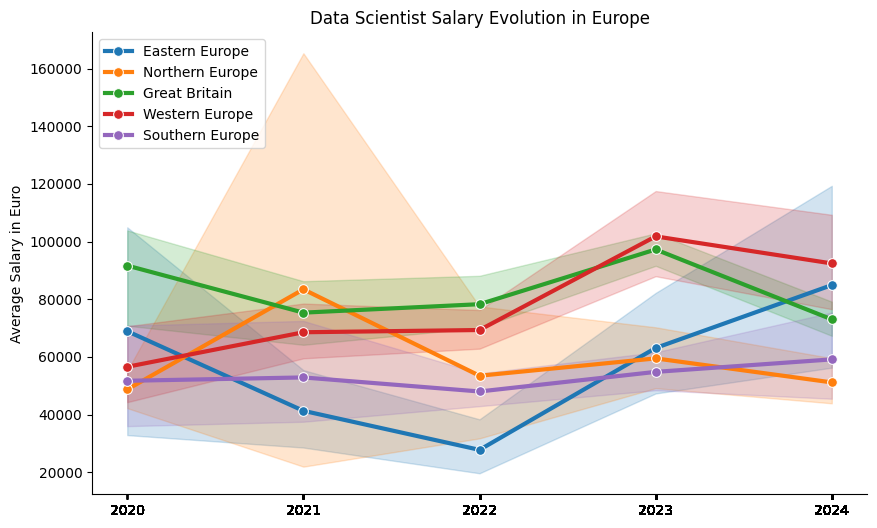

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data=DataSalariesEurope,
             x="work_year",
             y="salary_in_euro",
             hue="europe_zone",
             linewidth = 3,
             marker='o',
             markersize=7)

plt.xticks(DataSalariesEurope['work_year'])
plt.title('Data Scientist Salary Evolution in Europe')
plt.xlabel('')
plt.ylabel('Average Salary in Euro')

# # Remove the top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Place the legend in the upper left corner
plt.legend(loc='upper left')

# Save the plot as a PNG file
plt.savefig('Salary Evolution from 2024.png', dpi=300, bbox_inches='tight')

* Starting point (2020): GB ; Eastern ; Western; Southern and finally Northern
* Evolution until 2022:  
* Eastern EU: turning point in 2022 : going down to continue increasing. WHY????
* Northern EU: high level in 2021 , then descending

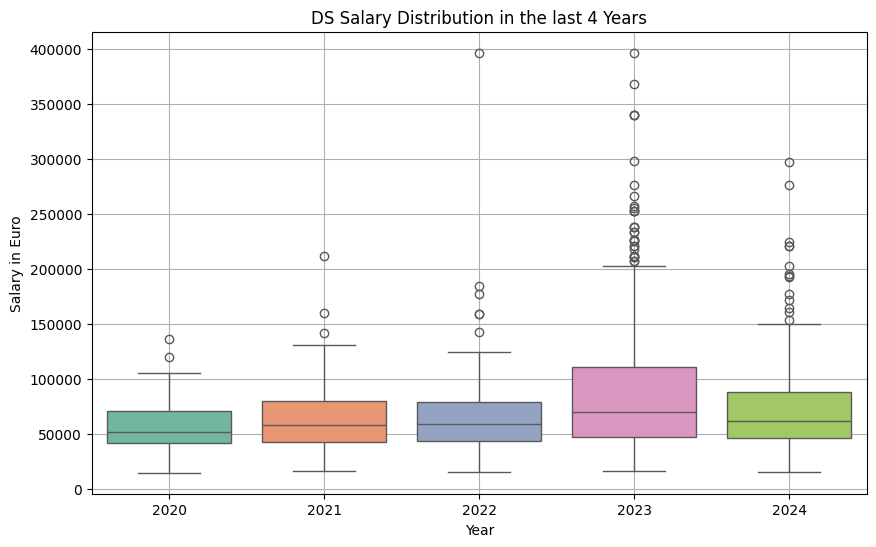

In [23]:
# Boxplot (to visualize the data distribution in each group)
plt.figure(figsize=(10,6))
sns.boxplot(x='work_year', y='salary_in_euro', data=DataSalariesEurope, palette='Set2')
plt.title('DS Salary Distribution in the last 4 Years')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Salary in Euro')
plt.show()

In [24]:
# Calculate the average salary per region
region_salary_avg = DataSalariesEurope.groupby('europe_zone')['salary_in_euro'].mean().reset_index()

# Sort the regions by average salary in descending order
region_salary_avg = region_salary_avg.sort_values(by='salary_in_euro', ascending=False)
region_salary_avg

,europe_zone,salary_in_euro
1,Great Britain,88122.754234
4,Western Europe,83800.207273
0,Eastern Europe,59667.229474
2,Northern Europe,56784.256140
3,Southern Europe,52669.407308


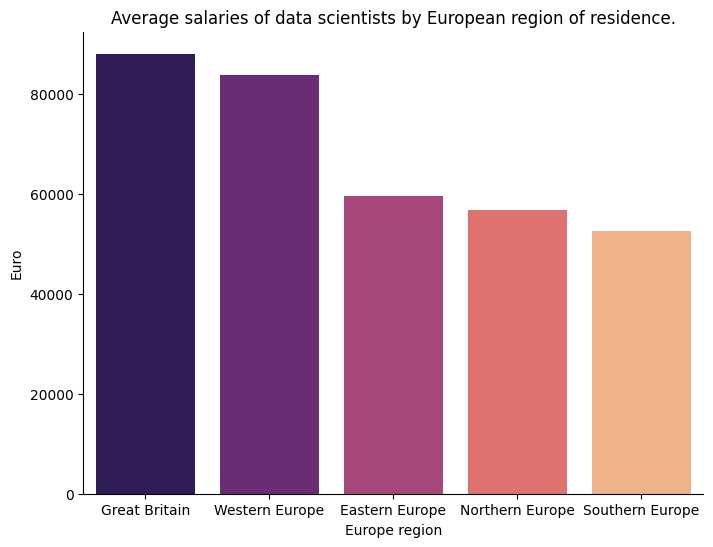

In [25]:
# Plot a histogram using seaborn
plt.figure(figsize=(8, 6))  # Optional: adjust the figure size
sns.barplot(data=region_salary_avg, x='europe_zone', y='salary_in_euro', palette="magma")
plt.title('Average salaries of data scientists by European region of residence.')
plt.xlabel('Europe region')
plt.ylabel('Euro')

# Remove the top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as a PNG file
plt.savefig('Average salaries of data scientists by European region of residence.png', dpi=300, bbox_inches='tight')

plt.show()

In [26]:
# Evolution of the average salary for Data Scientists across European regions over recent years and comparison with the European average 

In [27]:
DataSalariesEurope.head(5)

,work_year,experience_level,employment_type,job_title,job_category,salary,salary_currency,salary_in_usd,salary_in_euro,employee_residence,country_employee_residence,europe_zone,remote_ratio,company_location,company_size
0,2021,MI,FT,BI Data Analyst,Data Analyst,11000000,HUF,36259,33358.28,HU,Hungary,Eastern Europe,50,US,L
1,2020,MI,FT,Data Scientist,Data Scientist,11000000,HUF,35735,32876.20,HU,Hungary,Eastern Europe,50,HU,L
2,2022,EN,FT,Data Scientist,Data Scientist,6600000,HUF,17684,16269.28,HU,Hungary,Eastern Europe,100,HU,M
3,2023,EX,FT,Data Scientist,Data Scientist,1050000,NOK,100416,92382.72,NO,Norway,Northern Europe,50,NO,S
4,2023,SE,FT,Data Scientist,Data Scientist,800000,NOK,76508,70387.36,NO,Norway,Northern Europe,50,NO,S


In [28]:
# Create the base map of Europe
map = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# The data of countries and regions
data = [
    {'country': 'Hungary ', 'lat': 47.1625, 'lon': 19.5033, 'europe_region': 'Eastern Europe'},
    {'country': 'Norway', 'lat': 60.4720, 'lon': 8.4689, 'europe_region': 'Northern Europe'},
    {'country': 'Turkey', 'lat': 38.9637, 'lon': 35.2433, 'europe_region': 'Eastern Europe'},
    {'country': 'United Kingdom', 'lat': 55.3781, 'lon': -3.4360, 'europe_region':'Great Britain'},
    {'country': 'Denmark ', 'lat': 56.2639, 'lon': 9.5018, 'europe_region': 'Northern Europe'},
    {'country': 'Swizerland', 'lat': 46.8182, 'lon': 8.2275, 'europe_region': 'Western Europe'},
    {'country': 'Germany', 'lat': 51.1657, 'lon': 10.4515, 'europe_region': 'Western Europe'},
    {'country': 'Spain', 'lat': 40.4637, 'lon': -3.7492, 'europe_region': 'Southern Europe'},
    {'country': 'France ', 'lat': 46.6034, 'lon': 1.8883, 'europe_region': 'Western Europe'},
    {'country': 'Ukraine', 'lat': 48.3794, 'lon': 31.1656, 'europe_region': 'Eastern Europe'},
    {'country': 'Russia', 'lat': 55.7558, 'lon': 37.6173, 'europe_region': 'Northern Europe'},
    {'country': 'Poland', 'lat': 51.9194, 'lon': 19.1451, 'europe_region':'Eastern Europe'},
    {'country': 'Ireland ', 'lat': 53.1424, 'lon': -7.6921, 'europe_region': 'Great Britain'},
    {'country': 'Netherlands', 'lat': 52.3794, 'lon': 4.9009, 'europe_region': 'Western Europe'},
    {'country': 'Sweeden', 'lat': 60.1282, 'lon': 18.6435, 'europe_region': 'Northern Europe'},
    {'country': 'Lithuania  ', 'lat': 55.1694, 'lon': 23.8813, 'europe_region': 'Northern Europe'},
    {'country': 'Portugal ', 'lat': 39.3999, 'lon': -8.2245, 'europe_region': 'Southern Europe'},
    {'country': 'Finland', 'lat': 61.9241, 'lon': 25.7482, 'europe_region': 'Northern Europe'},
    {'country': 'Croatia', 'lat': 45.1, 'lon': 15.2, 'europe_region': 'Southern Europe'},
    {'country': 'Slovenia', 'lat': 46.1511, 'lon': 14.9955, 'europe_region': 'Eastern Europe'},
    {'country': 'Austria', 'lat': 47.5162, 'lon': 14.5501, 'europe_region': 'Western Europe'},
    {'country': 'Greece', 'lat': 39.0742, 'lon': 21.8243, 'europe_region':'Southern Europe'},
    {'country': 'Belgium', 'lat': 50.8503, 'lon': 4.3517, 'europe_region': 'Western Europe'},
    {'country': 'Malta ', 'lat': 35.9375, 'lon': 14.3754, 'europe_region': 'Southern Europe'},
    {'country': 'Latvia', 'lat': 56.8796, 'lon': 24.6032, 'europe_region':'Northern Europe'},
    {'country': 'Italy', 'lat': 41.8719, 'lon': 12.5674, 'europe_region': 'Southern Europe'},
    {'country': 'Czechia', 'lat': 49.8175, 'lon': 15.4730, 'europe_region': 'Eastern Europe'},
    {'country': 'Gibraltar', 'lat': 36.1408, 'lon': -5.3536, 'europe_region':'Southern Europe'},
    {'country': 'Romania ', 'lat': 45.9432, 'lon': 24.9668, 'europe_region': 'Eastern Europe'},
    {'country': 'Estonia ', 'lat': 58.5953, 'lon': 25.0136, 'europe_region': 'Northern Europe'},
    {'country': 'Luxembourg', 'lat': 49.6117, 'lon': 6.13, 'europe_region': 'Western Europe'},
    {'country': 'Andorra ', 'lat': 42.5078, 'lon': 1.5211, 'europe_region': 'Southern Europe'},
    {'country': 'Moldavia', 'lat': 47.0105, 'lon': 28.8591, 'europe_region': 'Eastern Europe'}
]

# Define the colors for each region
colours = {
    'Eastern Europe': 'blue',
    'Great Britain': 'green',
    'Northern Europe': 'purple',
    'Southern Europe': 'orange',
    'Western Europe': 'red'
}

# Place markers on the map for each country, with colors according to the region
for country_info in data:
    country = country_info['country']
    lat = country_info['lat']
    lon = country_info['lon']
    region = country_info['europe_region']
    color = colours.get(region, 'gray')  # Usar 'gray' por defecto si no hay color definido
    
    # Add a marker to the map
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=country
    ).add_to(map)

# Show the map in the notebook
map

In [29]:
# Group by 'work_year' and 'europe_zone' and calculate the average 'salary_in_euro
salary_mean_year_euzones = DataSalariesEurope.groupby(['work_year', 'europe_zone'])['salary_in_euro'].agg(
    mean='mean'
).reset_index()


In [30]:
salary_mean_year_eu= DataSalariesEurope.groupby('work_year')['salary_in_euro'].agg(
    EU_mean='mean'
).reset_index()


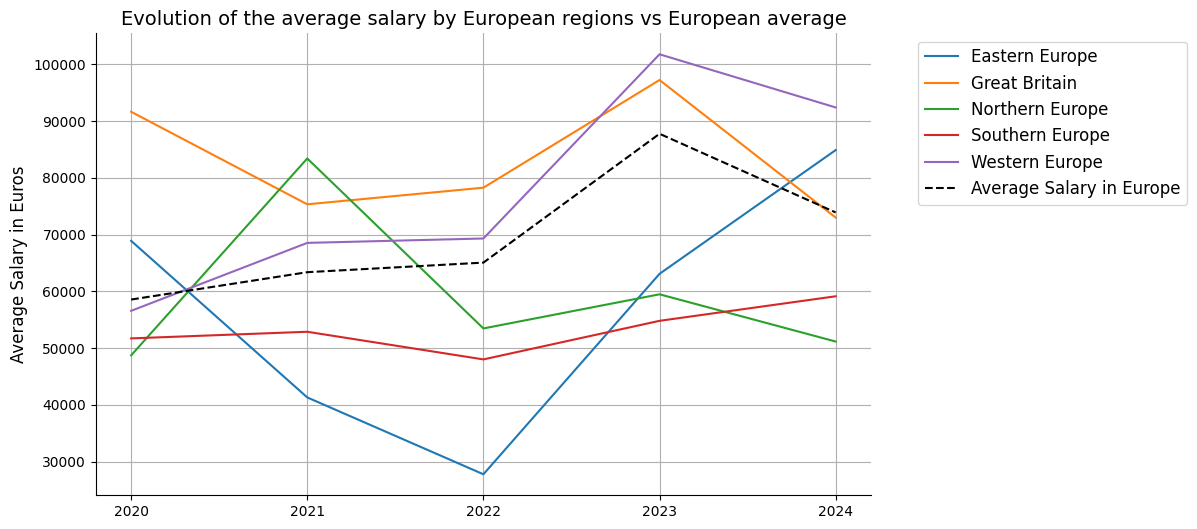

In [31]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot the average salaries by European zone
for zone in salary_mean_year_euzones['europe_zone'].unique():
    zone_data = salary_mean_year_euzones[salary_mean_year_euzones['europe_zone'] == zone]
    plt.plot(zone_data['work_year'], zone_data['mean'], label=f'{zone}')

#  Plot the average for Europe
plt.plot(salary_mean_year_eu['work_year'], salary_mean_year_eu['EU_mean'], label='Average Salary in Europe', linestyle='--', color='black')

# Customize the graph
plt.xlabel('')
plt.ylabel('Average Salary in Euros', fontsize=12)
plt.title('Evolution of the average salary by European regions vs European average', fontsize=14)
plt.legend(title='', loc='upper left', fontsize=12, bbox_to_anchor=(1.05, 1))
plt.grid(True)

# Remove the top and right borders
plt.gca().spines['top'].set_color('none')  # Quitar el borde superior
plt.gca().spines['right'].set_color('none')  # Quitar el borde izquierdo

# Remove decimals on the x-axis and display only one value per year
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))

# Save the graph to a PNG file
plt.savefig('Evolution of the average salary by European regions vs European average.png', dpi=300, bbox_inches='tight')

# Show the graph
plt.show()

In [32]:
# Group by 'work_year' and 'job_category' and calculate the average 'salary_in_euro
salary_mean_year_jobcat = DataSalariesEurope.groupby(['work_year', 'job_category'])['salary_in_euro'].agg(
    mean='mean'
).reset_index()


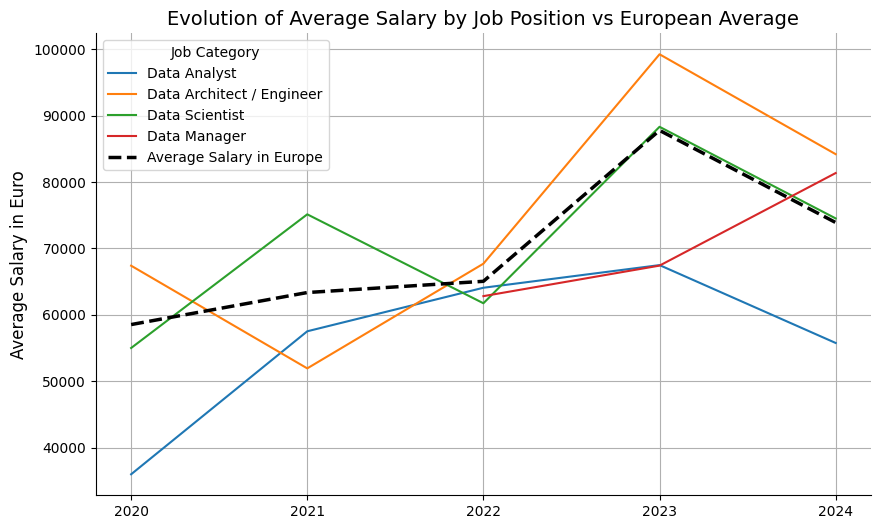

In [33]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot the average salaries by European zone
for category in salary_mean_year_jobcat['job_category'].unique():
    category_data = salary_mean_year_jobcat[salary_mean_year_jobcat['job_category'] == category]
    plt.plot(category_data['work_year'], category_data['mean'], label=f'Job_Category {category}')

# Plot the average for Europe
plt.plot(salary_mean_year_eu['work_year'], salary_mean_year_eu['EU_mean'], 
         label='Average Salary in Europe', linestyle='--', color='black', linewidth=2.5)

# Customize the graph
plt.xlabel('')
plt.ylabel('Average Salary in Euro',fontsize=12)
plt.title('Evolution of Average Salary by Job Position vs European Average',fontsize=14)
plt.legend(["Data Analyst", "Data Architect / Engineer", "Data Scientist","Data Manager", "Average Salary in Europe"], loc='upper left', title='Job Category')
plt.grid(True)

# Remove the top and right borders
plt.gca().spines['top'].set_color('none')  # Quitar el borde superior
plt.gca().spines['right'].set_color('none')  # Quitar el borde izquierdo

# Remove decimals on the x-axis and display only one value per year
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))

# Save the graph to a PNG file
plt.savefig('Evolution of the average salary by Job Position vs European average.png', dpi=300, bbox_inches='tight')

# Show the graph
plt.show()

In [34]:
# Calculate the average salary per country
country_salary_avg = DataSalariesEurope.groupby('country_employee_residence')['salary_in_euro'].mean().reset_index()
# Sort the regions by average salary in descending order
country_salary_avg.head(10)  #Ranking de los 10 países cuyo residentes cobran más en Data Science


,country_employee_residence,salary_in_euro
0,Andorra,46685.400000
1,Austria,62908.496000
2,Belgium,87920.566667
3,Bulgaria,73600.000000
4,Croatia,60446.024000
5,Cyprus,58604.920000
6,Czech Republic,55199.540000
7,Denmark,28697.253333
8,Estonia,40426.472727
9,Finland,66148.000000


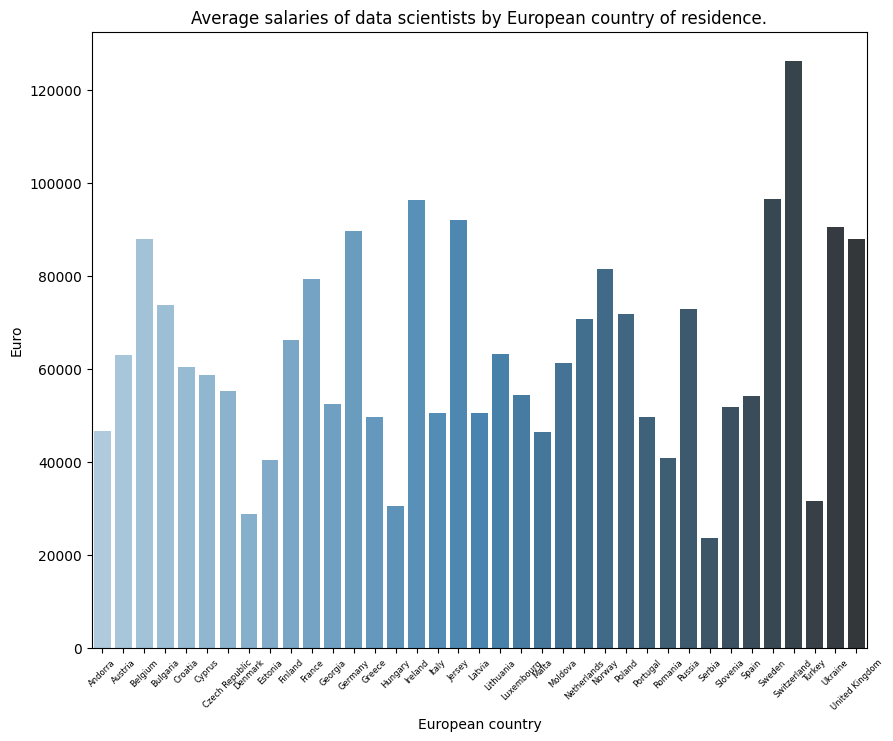

In [35]:
# Plot a histogram using seaborn
plt.figure(figsize=(10, 8))  # Optional: adjust the figure size
sns.barplot(data=country_salary_avg, x='country_employee_residence', y='salary_in_euro', palette="Blues_d")
plt.title('Average salaries of data scientists by European country of residence.')
plt.xlabel('European country')
plt.ylabel('Euro')
plt.xticks(rotation=45 , fontsize=6)
plt.show()

#CONCLUSIONES : Este no me gusta porque hay demasiados países en el eje de las x. 
# La media de Suiza se presta a más análisis. 
# Podríamos categorizar 4 grupos: 1. [- 40.000] 2.[40.000 - 60.000] 3.[60.000 - 80.000] 4.[+ 80.000]

#**Hypothesis 2**

Generally, greater experience correlates with higher salary levels. 

We will analyze data to determine if this holds true across all countries and job positions.

In [36]:
#We converted the variable experience to numeric values
DataSalariesEurope['experience_level_num']= DataSalariesEurope['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
DataSalariesEurope.head(5)

,work_year,experience_level,employment_type,job_title,job_category,salary,salary_currency,salary_in_usd,salary_in_euro,employee_residence,country_employee_residence,europe_zone,remote_ratio,company_location,company_size,experience_level_num
0,2021,MI,FT,BI Data Analyst,Data Analyst,11000000,HUF,36259,33358.28,HU,Hungary,Eastern Europe,50,US,L,2
1,2020,MI,FT,Data Scientist,Data Scientist,11000000,HUF,35735,32876.20,HU,Hungary,Eastern Europe,50,HU,L,2
2,2022,EN,FT,Data Scientist,Data Scientist,6600000,HUF,17684,16269.28,HU,Hungary,Eastern Europe,100,HU,M,1
3,2023,EX,FT,Data Scientist,Data Scientist,1050000,NOK,100416,92382.72,NO,Norway,Northern Europe,50,NO,S,4
4,2023,SE,FT,Data Scientist,Data Scientist,800000,NOK,76508,70387.36,NO,Norway,Northern Europe,50,NO,S,3


In [37]:
hue_order = ['EN','MI','SE','EX']

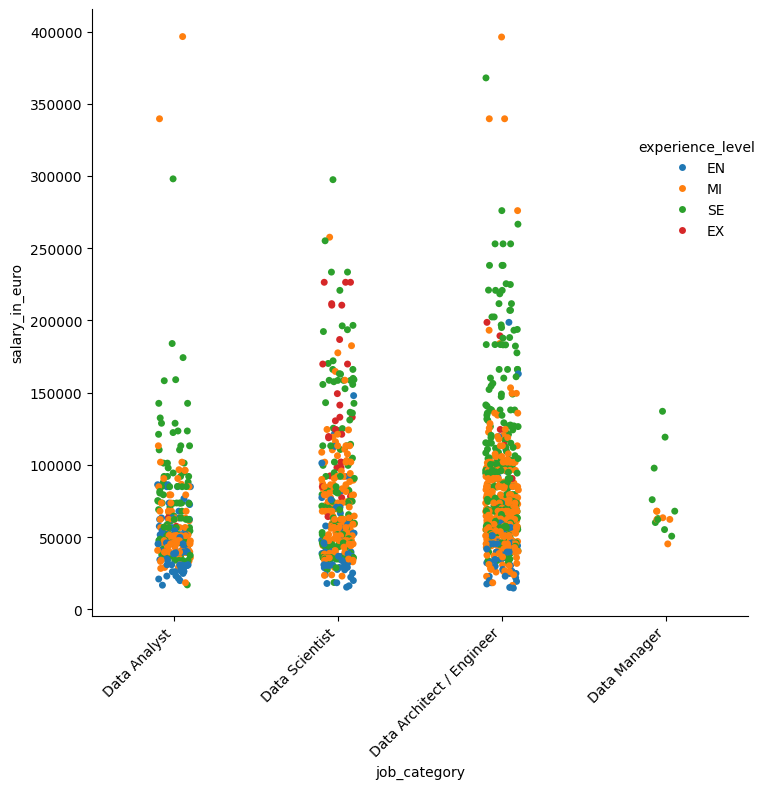

In [38]:
#With this catplot, we obtain the distribution of the variable salary_in_euro, by job position and worker experience.
chart = sns.catplot(
    x="job_category",
    y="salary_in_euro",
    hue="experience_level",
    data=DataSalariesEurope,
    height=8,
    aspect=.8,
hue_order=hue_order,
)
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.tight_layout()
# Cambiar la ubicación de la leyenda
chart._legend.set_bbox_to_anchor((1, 0.75))



It can be seen that there is some correlation between experience level and salary level. However, the graph is not clear enough to show this in the presentation.

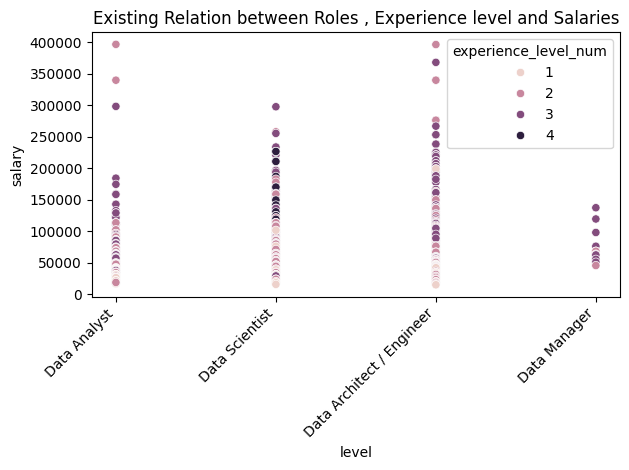

In [39]:
#Scatter plot between experience level and salary
sns.scatterplot(data=DataSalariesEurope, x='job_category', y='salary_in_euro', hue='experience_level_num')
plt.title('Existing Relation between Roles , Experience level and Salaries')
plt.xlabel('level')
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.tight_layout()
plt.ylabel('salary')
plt.show()


In [40]:
# Agrupa por 'experience_level' y 'job_category' y calcula la media del salario
df_experience_jobcategory_salary_mean = DataSalariesEurope.groupby(['job_category', 'experience_level'])['salary_in_euro'].mean().unstack(fill_value=0)
df_experience_jobcategory_salary_mean


experience_level,EN,EX,MI,SE
job_category,,,,
Data Analyst,45418.535789,60375.000000,61949.918681,79551.638280
Data Architect / Engineer,50772.057037,131682.820000,74419.760319,106396.708000
Data Manager,0.000000,0.000000,61503.533333,78872.152000
Data Scientist,47650.548148,140978.482963,70902.116312,82918.964027


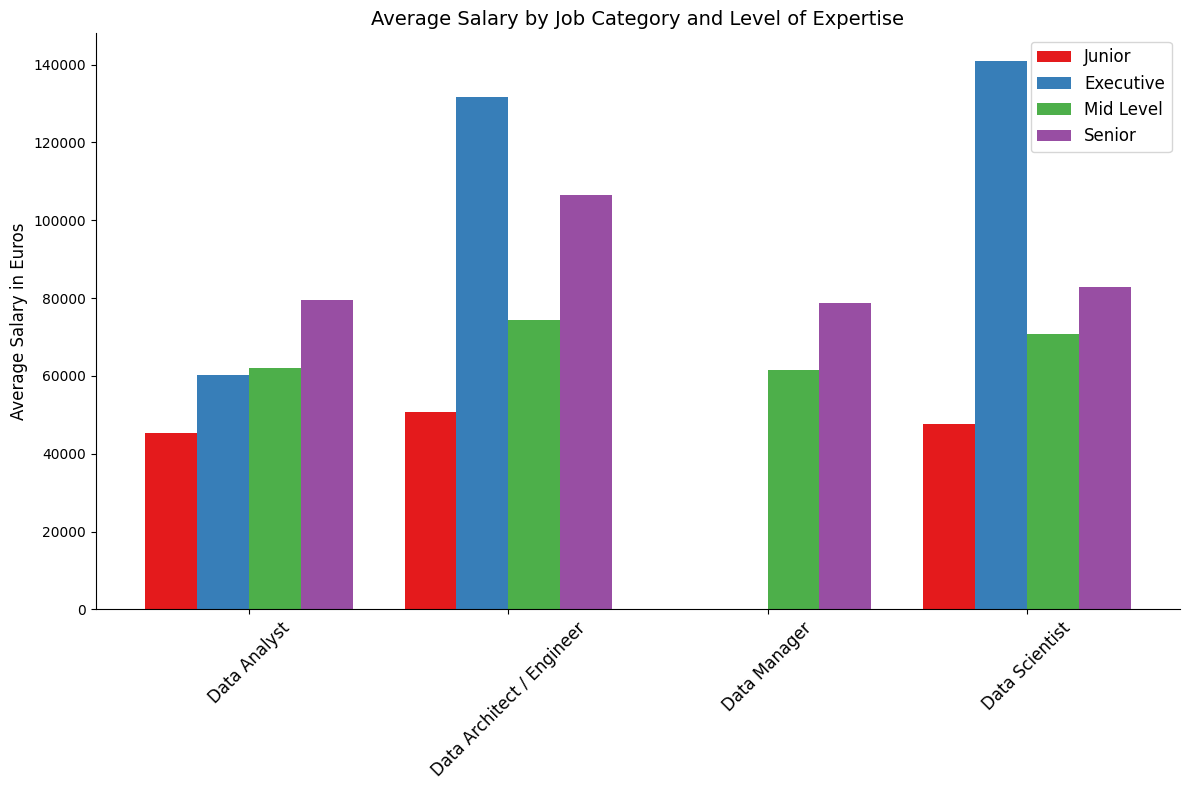

In [41]:
# Figure configuration
fig, ax = plt.subplots(figsize=(12, 8))

# Necessary variables
job_categories = df_experience_jobcategory_salary_mean.index  # Categorías de trabajo en el eje x
experience_level = df_experience_jobcategory_salary_mean.columns  # Valores de experience_level
bar_width = 0.2  # Ancho de cada barra
x = np.arange(len(job_categories))  # Posición en el eje x para cada categoría de trabajo

# Mapping each experience level to its descriptive name
experience_labels = {
    'EN': 'Junior',
    'MI': 'Mid Level',
    'SE': 'Senior',
    'EX': 'Executive'
}

# Define a color palette for the different experience level
colors = plt.get_cmap('Set1')  # Get the 'Set1' palette, which has 10 different colors

# Create a bar for each experience level value with different colors
for i, level in enumerate(experience_level):
    ax.bar(x + i * bar_width, 
           df_experience_jobcategory_salary_mean[level], 
           width=bar_width, 
           label=experience_labels.get(level, level), 
           color=colors(i))  # Assign color based on the palette

# Reorder the experience levels in the DataFrame if they are not in the desired order
experience_order = ['EN', 'MI', 'SE', 'EX']
df_experience_jobcategory_salary_mean = df_experience_jobcategory_salary_mean[experience_order]

# Graph configuration
ax.set_xlabel("")  # Increase the size of the x-axis label
ax.set_ylabel("Average Salary in Euros", fontsize=12)  # Increase the size of the y-axis label
ax.set_title("Average Salary by Job Category and Level of Expertise", fontsize=14)  # Increase the title size

# Adjust the x-axis label positions to center them
ax.set_xticks(x + bar_width * (len(experience_level) - 1) / 2)  # Place the labels in the center of the bar group
ax.set_xticklabels(job_categories, rotation=45, ha='center', fontsize=12) # Center the labels and increase their size

# Legend with larger font size
ax.legend(fontsize=12)

# Remove the top and right borders of the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjustment and display
plt.tight_layout()

# Save the graph as a PNG file
plt.savefig('Average Salary by Job Category and Level of Expertise.png', dpi=300, bbox_inches='tight')

plt.show()




#**Hypothesis 3**

What are the highest-paid positions? Do they match across all European countries? -> ranking of the highest-paid positions and variation between countries (higher demand for certain positions, shortage of profiles, etc.)

In [42]:
DataSalariesEurope.head()

,work_year,experience_level,employment_type,job_title,job_category,salary,salary_currency,salary_in_usd,salary_in_euro,employee_residence,country_employee_residence,europe_zone,remote_ratio,company_location,company_size,experience_level_num
0,2021,MI,FT,BI Data Analyst,Data Analyst,11000000,HUF,36259,33358.28,HU,Hungary,Eastern Europe,50,US,L,2
1,2020,MI,FT,Data Scientist,Data Scientist,11000000,HUF,35735,32876.20,HU,Hungary,Eastern Europe,50,HU,L,2
2,2022,EN,FT,Data Scientist,Data Scientist,6600000,HUF,17684,16269.28,HU,Hungary,Eastern Europe,100,HU,M,1
3,2023,EX,FT,Data Scientist,Data Scientist,1050000,NOK,100416,92382.72,NO,Norway,Northern Europe,50,NO,S,4
4,2023,SE,FT,Data Scientist,Data Scientist,800000,NOK,76508,70387.36,NO,Norway,Northern Europe,50,NO,S,3


In [43]:
# Calculate the average salary by category
avg_salary_category = DataSalariesEurope.groupby('job_category')['salary_in_euro'].mean().reset_index()

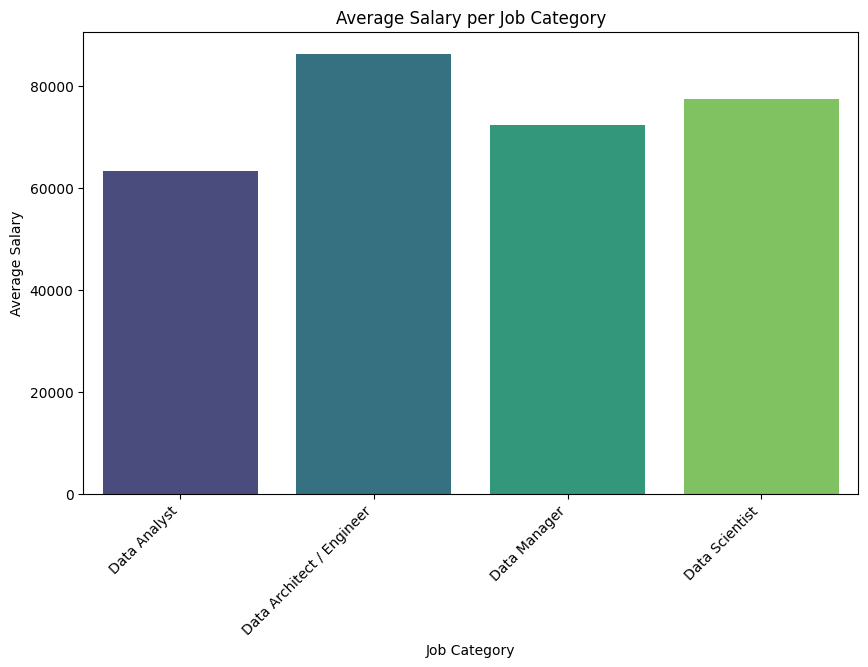

In [44]:

# Figure configuration
plt.figure(figsize=(10, 6))
sns.barplot(x='job_category', y='salary_in_euro',data=avg_salary_category, palette='viridis')
plt.title('Average Salary per Job Category')
plt.xlabel('Job Category')
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.ylabel('Average Salary')


# Save the graph as a PNG file
plt.savefig('Avg Salary per Job Category.png', dpi=300, bbox_inches='tight')

plt.show()

#**Hypothesis 4**
How does company size influence? Are larger companies, whose budgets are presumably higher, more generous?

#**Hypothesis 5**

Where are the companies that hire European data scientists mainly located? Does their location, such as in a country with tax advantages, positively influence the salaries offered?

In [45]:
df_company_location_salary = DataSalariesEurope.groupby('company_location')['salary_in_euro'].mean().reset_index()
#df_company_location_salary
#mean= df_company_location_salary['salary_in_euro'].mean()
#mean

In [46]:
#DataSalariesEurope['company_location'].value_counts()

In [47]:

# List of countries with their coordinates, number of data scientists hired, and average salary
data = [
    {'country': 'United States', 'lat': 37.0902, 'lon': -95.7129, 'num_ds': 21, 'mean_salary_in_euro': 88891.100952},
    {'country': 'Hungary ', 'lat': 47.1625, 'lon': 19.5033, 'num_ds': 4, 'mean_salary_in_euro': 36742.960000},
    {'country': 'Norway', 'lat':  60.4720, 'lon': 8.4689, 'num_ds': 2, 'mean_salary_in_euro': 81385.040000},
    {'country': 'Turkey', 'lat': 38.9637, 'lon': 35.2433, 'num_ds': 6, 'mean_salary_in_euro': 21247.093333},
    {'country': 'United Kingdom', 'lat':  55.3781, 'lon': - 3.4360, 'num_ds': 653, 'mean_salary_in_euro': 87765.992086},
    {'country': 'Denmark ', 'lat': 56.2639, 'lon':  9.5018, 'num_ds': 5, 'mean_salary_in_euro': 45450.392000},
    {'country': 'Swizerland', 'lat':   46.8182, 'lon':  8.2275, 'num_ds': 8, 'mean_salary_in_euro': 126212.500000},
    {'country': 'Germany', 'lat':  51.1657, 'lon': 10.4515, 'num_ds': 93, 'mean_salary_in_euro': 86589.094194}, 
    {'country': 'Spain', 'lat':  40.4637, 'lon': - 3.7492, 'num_ds': 127, 'mean_salary_in_euro': 52271.777638},
    {'country': 'France ', 'lat': 46.6034, 'lon':   1.8883, 'num_ds': 58, 'mean_salary_in_euro': 77453.546897},
    {'country': 'Ukraine', 'lat': 48.3794, 'lon':   31.1656, 'num_ds': 10, 'mean_salary_in_euro': 97152.000000},
    {'country': 'Russia', 'lat':  55.7558, 'lon':  37.6173, 'num_ds': 5, 'mean_salary_in_euro': 78099.720000}, 
    {'country': 'Poland', 'lat': 51.9194, 'lon': 19.1451, 'num_ds':14, 'mean_salary_in_euro': 76436.688571},
    {'country': 'Ireland ', 'lat':  53.1424, 'lon': - 7.6921, 'num_ds': 12, 'mean_salary_in_euro': 96319.323333},
    {'country': 'Netherlands', 'lat': 52.3794, 'lon':  4.9009, 'num_ds': 28, 'mean_salary_in_euro': 70078.075714},
    {'country': 'Sweeden', 'lat':  60.1282, 'lon':  18.6435, 'num_ds': 3, 'mean_salary_in_euro': 90888.026667},
    {'country': 'Israel', 'lat': 31.0461, 'lon':  34.8516, 'num_ds':1, 'mean_salary_in_euro': 105800.000000},
    {'country': 'Lithuania  ', 'lat':  55.1694, 'lon':  23.8813, 'num_ds': 16, 'mean_salary_in_euro': 63068.817500},
    {'country': 'Portugal ', 'lat': 39.3999, 'lon':  -  8.2245, 'num_ds': 27, 'mean_salary_in_euro': 47025.936296},
    {'country': 'Finland', 'lat':   61.9241, 'lon':  25.7482, 'num_ds': 3, 'mean_salary_in_euro': 66148.000000},
    {'country': 'China ', 'lat': 35.8617, 'lon':  104.1954, 'num_ds':1, 'mean_salary_in_euro': 92000.000000},
    {'country': 'Croatia', 'lat':  45.1, 'lon':   15.2, 'num_ds': 3, 'mean_salary_in_euro': 70587.920000},
    {'country': 'Slovenia', 'lat': 46.1511, 'lon': 14.9955, 'num_ds': 6, 'mean_salary_in_euro': 51691.426667},
    {'country': 'Austria', 'lat': 47.5162, 'lon':  14.5501, 'num_ds': 10, 'mean_salary_in_euro': 63000.956000},
    {'country': 'Greece', 'lat':  39.0742, 'lon':  21.8243, 'num_ds':14, 'mean_salary_in_euro': 48079.988571},
    {'country': 'Belgium', 'lat':   50.8503, 'lon':  4.3517, 'num_ds': 4, 'mean_salary_in_euro': 70715.570000},
    {'country': 'Malta ', 'lat': 35.9375, 'lon':  14.3754, 'num_ds': 3, 'mean_salary_in_euro': 46389.160000},
    {'country': 'India', 'lat': 20.5937, 'lon': 78.9629, 'num_ds': 1, 'mean_salary_in_euro': 16707.200000},
    {'country': 'Latvia', 'lat': 56.8796, 'lon':  24.6032, 'num_ds':14, 'mean_salary_in_euro': 50356.134286},
    {'country': 'Italy', 'lat': 41.8719, 'lon': 12.5674, 'num_ds': 14, 'mean_salary_in_euro': 45632.394286},
    {'country': 'Czechia', 'lat': 49.8175, 'lon':  15.4730, 'num_ds': 1, 'mean_salary_in_euro': 64399.080000},
    {'country': 'Canada', 'lat':  56.1304, 'lon': - 106.3468, 'num_ds': 3, 'mean_salary_in_euro': 48521.413333},
    {'country': 'Gibraltar', 'lat':  36.1408, 'lon':  - 5.3536, 'num_ds':1, 'mean_salary_in_euro': 73577.920000},
    {'country': 'Romania ', 'lat': 45.9432, 'lon': 24.9668, 'num_ds': 4, 'mean_salary_in_euro': 41135.960000},
    {'country': 'Estonia ', 'lat':  58.5953, 'lon': 25.0136, 'num_ds': 12, 'mean_salary_in_euro': 41941.343333},
    {'country': 'Luxembourg', 'lat': 49.6117, 'lon':  6.13, 'num_ds': 2, 'mean_salary_in_euro': 56040.880000},
    {'country': 'Andorra ', 'lat':   42.5078, 'lon':  1.5211, 'num_ds': 1, 'mean_salary_in_euro': 46685.400000},
    {'country': 'Moldavia', 'lat': 47.0105, 'lon': 28.8591, 'num_ds': 1, 'mean_salary_in_euro': 16560.000000},
]




In [48]:
# Create the map centered on the average coordinates of the countries
m = folium.Map(location=[20, 0], zoom_start=2)

# Scale the size of the circles and color intensity
max_num_ds = max(item['num_ds'] for item in data)
max_salary = max(item['mean_salary_in_euro'] for item in data)

def color_scale(salary, max_salary):
    ratio = salary / max_salary
    red = int(255 * ratio)
    green = int(127 * (1 - ratio))
    blue = int(255 * (1 - ratio))
    return f'#{red:02x}{green:02x}{blue:02x}'  # Transition from purple to orange

# Add circles for each country
for item in data:
    # # Circle size based on the number of DS, adjusted by a scaling factor
    radius = (item['num_ds'] / max_num_ds) * 50  # Adjust the factor as desired for visualization
    
    # Color scaled from purple to orange for average salary
    color = color_scale(item['mean_salary_in_euro'], max_salary)
    
    # Add CircleMarker for each country
    folium.CircleMarker(
        location=[item['lat'], item['lon']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"{item['country']}: {item['num_ds']} DS, Salary Avg: Euro{item['mean_salary_in_euro']}"
    ).add_to(m)

# Custom legend
legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 160px; height: 120px;
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     padding: 10px; font-weight: bold;
     ">
     <div style="text-align: center;">Average Salary</div>
     <div style="background: linear-gradient(to right, #6a0dad, #ff7f00); height: 20px; width: 100%;"></div>
     <div style="text-align: left; padding-left: 10px; font-size: 12px;">-</div>
     <div style="text-align: right; padding-right: 10px; font-size: 12px;">+</div>
     </div>
     '''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save("map_DS_purple_to_orange.html")
m


In [49]:
# Crear el mapa base de Europa
map = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# Definir los colores para cada región
colores = {
    'Eastern Europe': 'blue',
    'Great Britain': 'green',
    'Northern Europe': 'purple',
    'Southern Europe': 'orange',
    'Western Europe': 'red'
}

# Los datos de los países y regiones
data = [
    {'country': 'Hungary ', 'lat': 47.1625, 'lon': 19.5033, 'europe_region': 'Eastern Europe'},
    {'country': 'Norway', 'lat': 60.4720, 'lon': 8.4689, 'europe_region': 'Northern Europe'},
    {'country': 'Turkey', 'lat': 38.9637, 'lon': 35.2433, 'europe_region': 'Eastern Europe'},
    {'country': 'United Kingdom', 'lat': 55.3781, 'lon': -3.4360, 'europe_region':'Great Britain'},
    {'country': 'Denmark ', 'lat': 56.2639, 'lon': 9.5018, 'europe_region': 'Northern Europe'},
    {'country': 'Swizerland', 'lat': 46.8182, 'lon': 8.2275, 'europe_region': 'Western Europe'},
    {'country': 'Germany', 'lat': 51.1657, 'lon': 10.4515, 'europe_region': 'Western Europe'},
    {'country': 'Spain', 'lat': 40.4637, 'lon': -3.7492, 'europe_region': 'Southern Europe'},
    {'country': 'France ', 'lat': 46.6034, 'lon': 1.8883, 'europe_region': 'Western Europe'},
    {'country': 'Ukraine', 'lat': 48.3794, 'lon': 31.1656, 'europe_region': 'Eastern Europe'},
    {'country': 'Russia', 'lat': 55.7558, 'lon': 37.6173, 'europe_region': 'Northern Europe'},
    {'country': 'Poland', 'lat': 51.9194, 'lon': 19.1451, 'europe_region':'Eastern Europe'},
    {'country': 'Ireland ', 'lat': 53.1424, 'lon': -7.6921, 'europe_region': 'Great Britain'},
    {'country': 'Netherlands', 'lat': 52.3794, 'lon': 4.9009, 'europe_region': 'Western Europe'},
    {'country': 'Sweeden', 'lat': 60.1282, 'lon': 18.6435, 'europe_region': 'Northern Europe'},
    {'country': 'Lithuania  ', 'lat': 55.1694, 'lon': 23.8813, 'europe_region': 'Northern Europe'},
    {'country': 'Portugal ', 'lat': 39.3999, 'lon': -8.2245, 'europe_region': 'Southern Europe'},
    {'country': 'Finland', 'lat': 61.9241, 'lon': 25.7482, 'europe_region': 'Northern Europe'},
    {'country': 'Croatia', 'lat': 45.1, 'lon': 15.2, 'europe_region': 'Southern Europe'},
    {'country': 'Slovenia', 'lat': 46.1511, 'lon': 14.9955, 'europe_region': 'Eastern Europe'},
    {'country': 'Austria', 'lat': 47.5162, 'lon': 14.5501, 'europe_region': 'Western Europe'},
    {'country': 'Greece', 'lat': 39.0742, 'lon': 21.8243, 'europe_region':'Southern Europe'},
    {'country': 'Belgium', 'lat': 50.8503, 'lon': 4.3517, 'europe_region': 'Western Europe'},
    {'country': 'Malta ', 'lat': 35.9375, 'lon': 14.3754, 'europe_region': 'Southern Europe'},
    {'country': 'Latvia', 'lat': 56.8796, 'lon': 24.6032, 'europe_region':'Northern Europe'},
    {'country': 'Italy', 'lat': 41.8719, 'lon': 12.5674, 'europe_region': 'Southern Europe'},
    {'country': 'Czechia', 'lat': 49.8175, 'lon': 15.4730, 'europe_region': 'Eastern Europe'},
    {'country': 'Gibraltar', 'lat': 36.1408, 'lon': -5.3536, 'europe_region':'Southern Europe'},
    {'country': 'Romania ', 'lat': 45.9432, 'lon': 24.9668, 'europe_region': 'Eastern Europe'},
    {'country': 'Estonia ', 'lat': 58.5953, 'lon': 25.0136, 'europe_region': 'Northern Europe'},
    {'country': 'Luxembourg', 'lat': 49.6117, 'lon': 6.13, 'europe_region': 'Western Europe'},
    {'country': 'Andorra ', 'lat': 42.5078, 'lon': 1.5211, 'europe_region': 'Southern Europe'},
    {'country': 'Moldavia', 'lat': 47.0105, 'lon': 28.8591, 'europe_region': 'Eastern Europe'}
]

# Definir los colores para cada región
colours = {
    'Eastern Europe': 'blue',
    'Great Britain': 'green',
    'Northern Europe': 'purple',
    'Southern Europe': 'orange',
    'Western Europe': 'red'
}

# Colocar marcadores en el mapa para cada país, con colores según la región
for country_info in data:
    country = country_info['country']
    lat = country_info['lat']
    lon = country_info['lon']
    region = country_info['europe_region']
    color = colours.get(region, 'gray')  # Usar 'gray' por defecto si no hay color definido
    
    # Añadir un marcador al mapa
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=country
    ).add_to(map)

# Mostrar el mapa en el notebook
map

# Save the map
m.save("map_DS_europe_zone.html")
m

#**Hypothesis 6**

Considering the reduction in labor costs in remote work, is there a higher salary for this type of workers? In which countries is this work model more prevalent? And for which positions?

In [50]:
df_remote_jobcategory = DataSalariesEurope.groupby(['remote_ratio', 'job_category']).size().reset_index().pivot(columns='remote_ratio',
                                                                                  index='job_category',
                                                                                  values=0)
df_remote_jobcategory

remote_ratio,0,50,100
job_category,,,
Data Analyst,190.0,14.0,58.0
Data Architect / Engineer,259.0,48.0,234.0
Data Manager,15.0,NaN,1.0
Data Scientist,209.0,66.0,96.0


In [51]:
# Calculate the total by category
df_totales_remote_jobcategory = df_remote_jobcategory.sum(axis=1)

In [52]:
# Calculate the percentages
df_porcentajes_remote_jobcategory = df_remote_jobcategory.div(df_totales_remote_jobcategory, axis=0) * 100

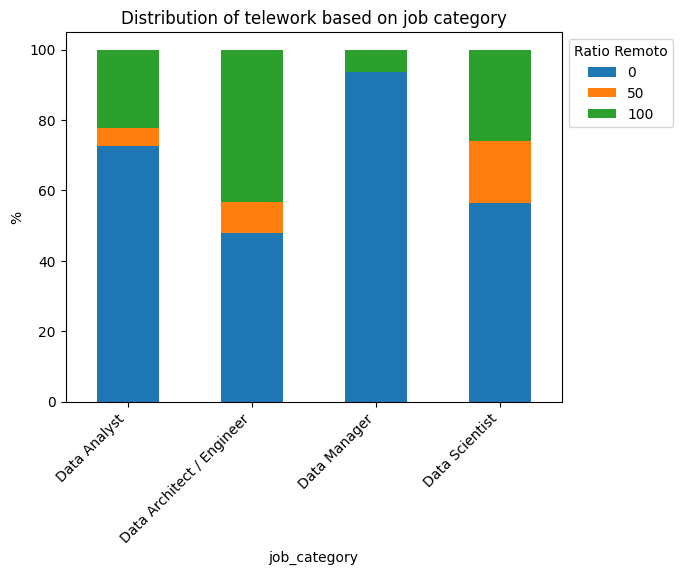

In [53]:
# Create the stacked bar chart
ax = df_porcentajes_remote_jobcategory.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('%')
plt.title('Distribution of telework based on job category')

# Move the legend outside of the chart box
ax.legend(title='Ratio Remoto', loc='upper left', bbox_to_anchor=(1, 1))

# Save the chart as a PNG file
plt.savefig('Distribution of telework based on job category.png', dpi=300, bbox_inches='tight')


In [54]:
#I HAVE TO KEEP ONLY THE COUNTRIES WHERE THERE ARE THE MOST DS
DataSalariesEurope['country_employee_residence'].value_counts().head()

country_employee_residence
United Kingdom    646
Spain             131
Germany            91
France             65
Portugal           30
Name: count, dtype: int64

In [55]:
# Group and count the elements
df_grouped = DataSalariesEurope.groupby(['remote_ratio', 'country_employee_residence']).size().reset_index(name='count')

# Get the first 10 values of 'employee_residence' based on frequency of occurrence
top_10_residences = DataSalariesEurope['country_employee_residence'].value_counts().nlargest(10).index
top_10_residences

# Filter the grouped DataFrame to contain only the top 10 'employee_residence'
df_filtered = df_grouped[df_grouped['country_employee_residence'].isin(top_10_residences)]

# Apply the pivot only with these 10 values
df_plot = df_filtered.pivot(columns='remote_ratio', index='country_employee_residence', values='count')
df_plot

remote_ratio,0,50,100
country_employee_residence,,,
France,14.0,25.0,26.0
Germany,38.0,25.0,28.0
Greece,2.0,1.0,14.0
Italy,2.0,5.0,14.0
Lithuania,16.0,NaN,NaN
Netherlands,10.0,7.0,11.0
Poland,NaN,NaN,15.0
Portugal,11.0,5.0,14.0
Spain,79.0,6.0,46.0


In [56]:
# Calculate the total by category
df_totales = df_plot.sum(axis=1)

In [57]:
# Calculate the percentages
df_porcentajes = df_plot.div(df_totales, axis=0) * 100

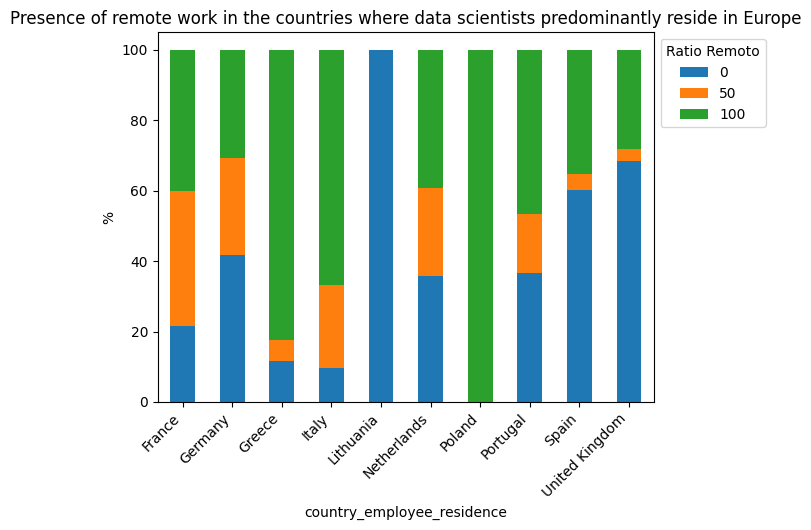

In [58]:
# Create the stacked bar chart
ax = df_porcentajes.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('%')
plt.title('Presence of remote work in the countries where data scientists predominantly reside in Europe')

# Remove the legend from the chart box
ax.legend(title='Ratio Remoto', loc='upper left', bbox_to_anchor=(1, 1))

# Save the chart as a PNG file
plt.savefig('Presence of remote work in the countries where data scientists predominantly reside in Europe.png', dpi=300, bbox_inches='tight')

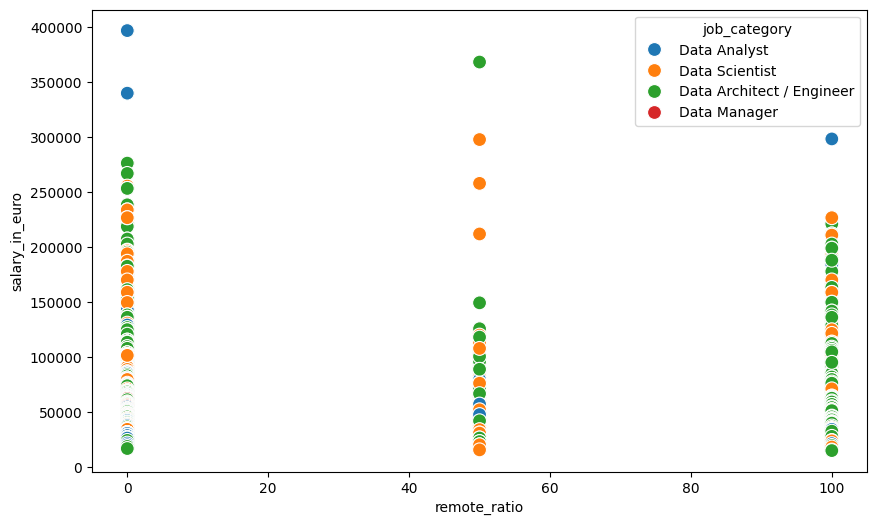

In [59]:
#RELATE IT TO SALARY LEVEL:

plt.figure(figsize=(10,6))
sns.scatterplot(x=DataSalariesEurope['remote_ratio'],
                y=DataSalariesEurope['salary_in_euro'],
                hue = DataSalariesEurope['job_category'],
               s=100);

In [60]:
# Group by 'remote_ratio' and 'job_category' and calculate the average salary.
df_remote_jobcategory_salary_mean = DataSalariesEurope.groupby(['job_category', 'remote_ratio'])['salary_in_euro'].mean().unstack(fill_value=0)
df_remote_jobcategory_salary_mean



remote_ratio,0,50,100
job_category,,,
Data Analyst,64192.922526,53201.168571,63221.242069
Data Architect / Engineer,94725.391660,70737.458333,80141.522393
Data Manager,69236.378667,0.000000,119197.040000
Data Scientist,77203.895311,66282.208485,85639.925000


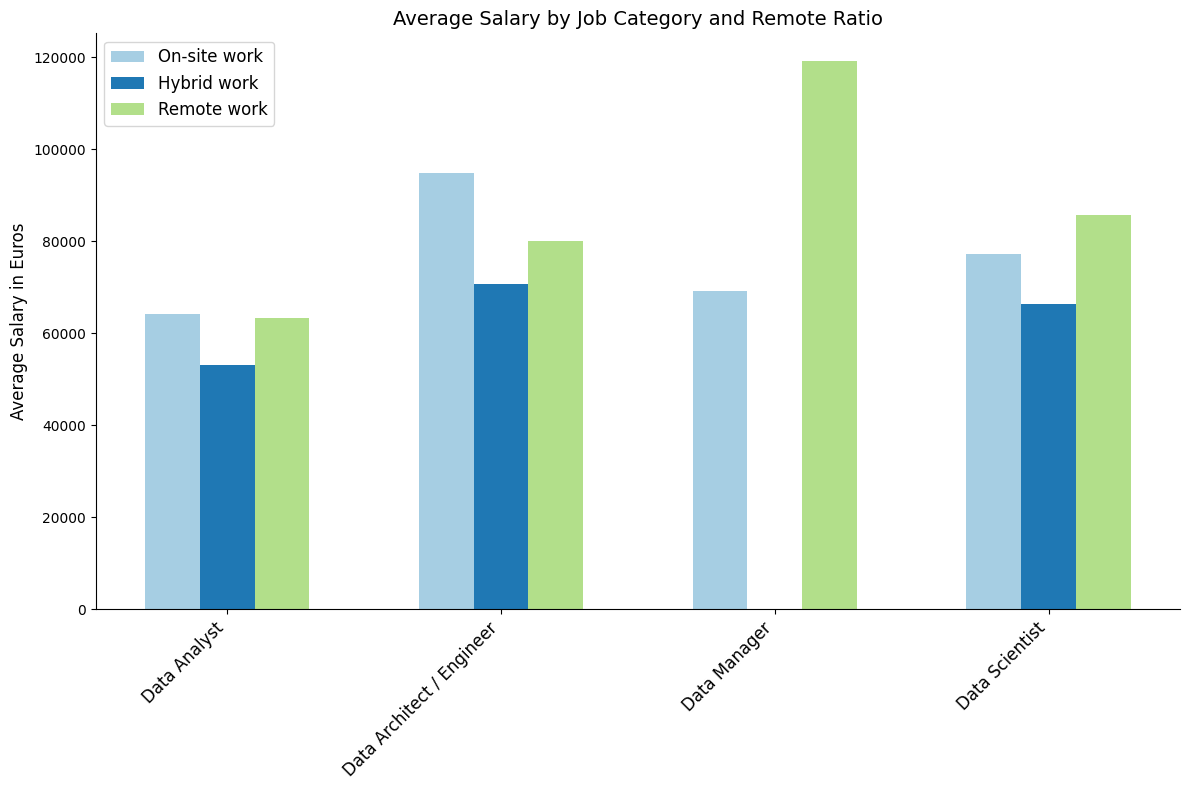

In [61]:
# Figure setup
fig, ax = plt.subplots(figsize=(12, 8))

# Required variables
job_categories = df_remote_jobcategory_salary_mean.index  # Job categories on the x-axis
remote_ratios = df_remote_jobcategory_salary_mean.columns  # remote_ratio values
bar_width = 0.2  # Width of each bar
x = np.arange(len(job_categories))  # Position on the x-axis for each job category

# Mapping for each remote_ratio type to its descriptive name
remote_labels = {
     0 : 'On-site work',
     50: 'Hybrid work',
     100: 'Remote work'
}

# Define a color palette for the different remote work levels
colors = plt.get_cmap('Paired')  # 'Set1' palette is used, which has 10 different colors

# Create a bar for each remote_ratio value
for i, remote_ratio in enumerate(remote_ratios):
    # Position of each bar offset according to its group
    ax.bar(x + i * bar_width, 
           df_remote_jobcategory_salary_mean[remote_ratio], 
           width=bar_width, 
           label=remote_labels.get(remote_ratio, remote_ratio), 
           color=colors(i)) 

# Graph settings
ax.set_xlabel("")
ax.set_ylabel("Average Salary in Euros", fontsize=12)
ax.set_title("Average Salary by Job Category and Remote Ratio", fontsize=14)
ax.set_xticks(x + bar_width * (len(remote_ratios) - 1) / 2)
ax.set_xticklabels(job_categories, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12, loc='upper left')

# Remove the top and right borders from the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjustment and display
plt.tight_layout()


# Save the chart as a PNG fil
plt.savefig('Avg Salary by Job Category and Remote Ratio.png', dpi=300, bbox_inches='tight')

plt.show()

SPIDER PLOT

Problem: Not all of my variables are numerical, so I need to convert them in order to represent them in a spider plot.

In [62]:
# Define the boundaries of the intervals (bins) and the labels for salaries in euros.
bins = [0, 40000, 50000, 60000, 70000, 80000, float("inf")]
labels = ['Under 40.000€', '40.000€-50.000€', '50.000€-60.000€', '60.000€-70.000€', '70.000€-80.000€', 'More than 80.000€']

# Crear una nueva columna en el DataFrame con la categoría de cada salario
DataSalariesEurope['salary_category'] = pd.cut(DataSalariesEurope['salary_in_euro'], bins=bins, labels=labels, right=False)
DataSalariesEurope.head(5)

,work_year,experience_level,employment_type,job_title,job_category,salary,salary_currency,salary_in_usd,salary_in_euro,employee_residence,country_employee_residence,europe_zone,remote_ratio,company_location,company_size,experience_level_num,salary_category
0,2021,MI,FT,BI Data Analyst,Data Analyst,11000000,HUF,36259,33358.28,HU,Hungary,Eastern Europe,50,US,L,2,Under 40.000€
1,2020,MI,FT,Data Scientist,Data Scientist,11000000,HUF,35735,32876.20,HU,Hungary,Eastern Europe,50,HU,L,2,Under 40.000€
2,2022,EN,FT,Data Scientist,Data Scientist,6600000,HUF,17684,16269.28,HU,Hungary,Eastern Europe,100,HU,M,1,Under 40.000€
3,2023,EX,FT,Data Scientist,Data Scientist,1050000,NOK,100416,92382.72,NO,Norway,Northern Europe,50,NO,S,4,More than 80.000€
4,2023,SE,FT,Data Scientist,Data Scientist,800000,NOK,76508,70387.36,NO,Norway,Northern Europe,50,NO,S,3,70.000€-80.000€


In [63]:
# Assign numerical values
experience_level_sorted = {'EN': 1, 'MI': 2, 'SE': 3, 'EX':4}
DataSalariesEurope['experience_level_num'] = DataSalariesEurope['experience_level'].map(experience_level_sorted)
#DataSalariesEurope.head(5)

company_size_revenues = {'S': 1, 'M': 2, 'L': 3}
DataSalariesEurope['company_size_num'] = DataSalariesEurope['company_size'].map(company_size_revenues)
#DataSalariesEurope.head(5)

salary_category_cat = {'Under 40.000€': 1, '40.000€-50.000€': 2, '50.000€-60.000€': 3, '60.000€-70.000€':4, '70.000€-80.000€':5, 'More than 80.000€':6}
DataSalariesEurope['salary_category_num'] = DataSalariesEurope['salary_category'].map(salary_category_cat)
#DataSalariesEurope.head(5)

In [64]:
# Calculate modes for Spider Plot
experience_level_mode = DataSalariesEurope.groupby('job_category')['experience_level_num'].agg(lambda x: stats.mode(x, keepdims=False).mode).reset_index().rename(columns={'experience_level_num': 'experience_level_mode'})
#experience_level_mode

company_size_mode = DataSalariesEurope.groupby('job_category')['company_size_num'].agg(lambda x: stats.mode(x, keepdims=False).mode).reset_index().rename(columns={'company_size_num': 'company_size_mode'})
#company_size_mode

remote_ratio_mode = DataSalariesEurope.groupby('job_category')['remote_ratio'].agg(lambda x: stats.mode(x, keepdims=False).mode).reset_index().rename(columns={'remote_ratio': 'remote_ratio_mode'})
#remote_ratio_mode

salary_category_mode = DataSalariesEurope.groupby('job_category')['salary_category_num'].agg(lambda x: stats.mode(x, keepdims=False).mode).reset_index().rename(columns={'salary_category': 'salary_category_mode'})
#salary_category_mode

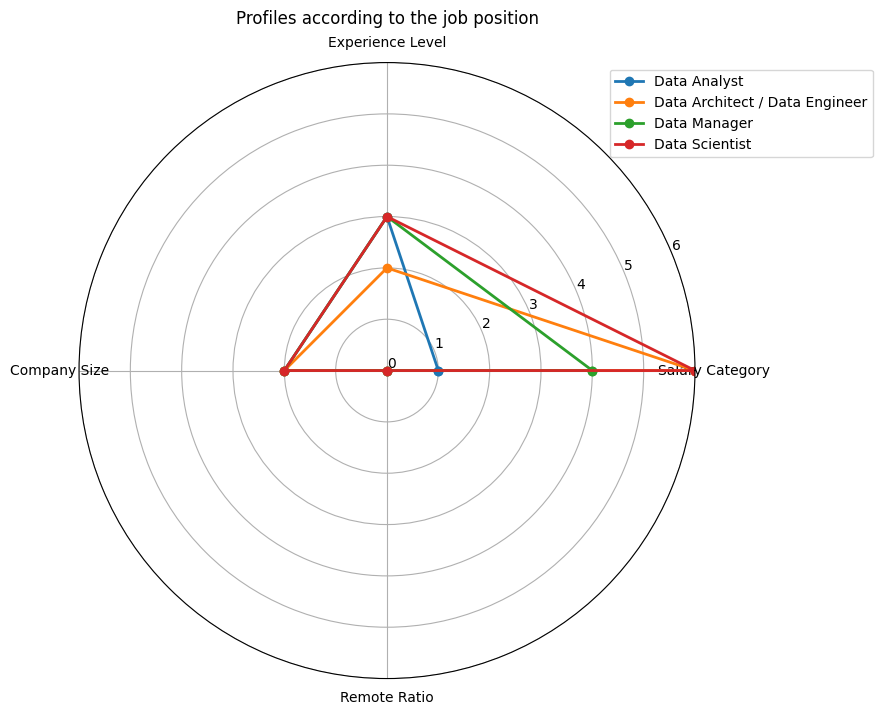

In [65]:
# Define the categories (like "telarañas")
categories = ['Data Analyst', 'Data Architect / Data Engineer', 'Data Manager', 'Data Scientist']

# Define the variables (which correspond to the different lines in the chart)
variables = ['Salary Category', 'Experience Level', 'Company Size', 'Remote Ratio']

# Mode values for the variables by job_category
values = {
    'Data Analyst': [1, 3, 2, 0],  # Mode of Variable 1, Variable 2, etc., in Category A
    'Data Architect / Data Engineer': [6, 2, 2, 0],
    'Data Manager': [4, 3, 2, 0],
    'Data Scientist': [6, 3, 2, 0]
}
# Number of categories
n = len(variables)

# Angles for each category
angles = np.linspace(0, 2*np.pi, n, endpoint=False)

# Join the first angle to the end to close the chart
angles = np.concatenate((angles, [angles[0]]))

# Create the figure and axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plot the data for each category
for categoria, valor in values.items():
    valor = np.concatenate((valor, [valor[0]]))  # Unir el primer valor al final
    ax.plot(angles, valor, 'o-', linewidth=2, label=categoria)

# Labels for the variables
ax.set_thetagrids(angles[:-1] * 180/np.pi, variables)

# Labels for the radial axes
ax.set_ylim(0, max(max(values.values(), key=max)))  # Adjust the upper limit according to the data
ax.set_yticks(np.arange(0, max(max(values.values(), key=max)) + 1, 1))
ax.set_yticklabels(np.arange(0, max(max(values.values(), key=max)) + 1, 1))

# Title and legend
ax.set_title('Profiles according to the job position', va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Save the chart as a PNG file
plt.savefig('Profiles according to the job position.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()



***What has more influence? A spider chart can be created to compare the influence of each variable on salary.***

Analysis of Variance (ANOVA)

In [66]:
# Filter by categories EXPERIENCE LEVEL
Entry_Level = DataSalariesEurope[DataSalariesEurope['experience_level'] == 'EN']['salary_in_euro']
Mid_Level = DataSalariesEurope[DataSalariesEurope['experience_level'] == 'MI']['salary_in_euro']
Senior_Level = DataSalariesEurope[DataSalariesEurope['experience_level'] == 'SE']['salary_in_euro']
Executive_Level = DataSalariesEurope[DataSalariesEurope['experience_level'] == 'EX']['salary_in_euro']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Entry_Level, Mid_Level, Senior_Level, Executive_Level)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 65.44848239135897
p-value: 3.66636250269986e-39



Interpretation

This p-value indicates an extremely low probability that the observed differences in the means of salary_in_euro between the experience_level groups are due to chance, assuming the null hypothesis is true (i.e., that the means are equal across all groups).

Since the p-value is much lower than the common significance level (e.g., 0.05), you can reject the null hypothesis with high confidence and conclude that there is a significant difference in salaries between experience levels.

In other words:

Statistical conclusion: The differences in salary between the different experience levels are not due to chance.
Practical interpretation: Experience level has a significant impact on salary in euros, and at least one of the experience groups has a mean salary different from the others.

In [67]:
# Filter by JOB CATEGORY
Data_Analyst = DataSalariesEurope[DataSalariesEurope['job_category'] == 'Data Analyst']['salary_in_euro']
Data_Architect_Data_Engineer = DataSalariesEurope[DataSalariesEurope['job_category'] == 'Data Architect / Engineer']['salary_in_euro']
Data_Manager = DataSalariesEurope[DataSalariesEurope['job_category'] == 'Data Manager']['salary_in_euro']
Data_Scientist = DataSalariesEurope[DataSalariesEurope['job_category'] == 'Data Scientist']['salary_in_euro']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Data_Analyst, Data_Architect_Data_Engineer, Data_Manager, Data_Scientist)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 12.896222000713903
P-value: 2.709064684647517e-08


In [68]:
# Filter by categories COUNTRY_EMPLOYEE_RESIDENCE

Hungary = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'HU']['salary_in_euro']
Norway= DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'NO']['salary_in_euro']
Turkey = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'TR']['salary_in_euro']
United_Kingdom = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'GB']['salary_in_euro']
Denmark = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'DK']['salary_in_euro']
Switzerland= DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'CH']['salary_in_euro']
Germany = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'DE']['salary_in_euro']
Spain = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'ES']['salary_in_euro']
France = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'FR']['salary_in_euro']
Ukraine = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'UA']['salary_in_euro']
Russia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'RU']['salary_in_euro']
Poland= DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'PL']['salary_in_euro']
Ireland = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'IE']['salary_in_euro']
Netherlands = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'NL']['salary_in_euro']
Sweden = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'SE']['salary_in_euro']
Lithuania = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'LT']['salary_in_euro']
Portugal= DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'PT']['salary_in_euro']
Finland = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'FI']['salary_in_euro']
Croatia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'HR']['salary_in_euro']
Slovenia= DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'SI']['salary_in_euro']
Austria = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'AT']['salary_in_euro']
Greece = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'GR']['salary_in_euro']
Belgium = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'BE']['salary_in_euro']
Malta= DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'MT']['salary_in_euro']
Latvia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'LV']['salary_in_euro']
Italy = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'IT']['salary_in_euro']
Czechia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'CZ']['salary_in_euro']
Romania = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'RO']['salary_in_euro']
Estonia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'EE']['salary_in_euro']
Luxembourg = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'LU']['salary_in_euro']
Andorra = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'AD']['salary_in_euro']
Moldova = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'MD']['salary_in_euro']
Jersey = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'JE']['salary_in_euro']
Bulgaria = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'BG']['salary_in_euro']
Cyprus = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'CY']['salary_in_euro']
Georgia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'GE']['salary_in_euro']
Serbia = DataSalariesEurope[DataSalariesEurope['employee_residence'] == 'RS']['salary_in_euro']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Data_Analyst, Data_Architect_Data_Engineer, Data_Manager, Data_Scientist)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 12.896222000713903
P-value: 2.709064684647517e-08


In [69]:
# Filter by categories COMPANY_SIZE
Small = DataSalariesEurope[DataSalariesEurope['company_size'] == 'S']['salary_in_euro']
Medium = DataSalariesEurope[DataSalariesEurope['company_size'] == 'M']['salary_in_euro']
Large = DataSalariesEurope[DataSalariesEurope['company_size'] == 'L']['salary_in_euro']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Data_Analyst, Data_Architect_Data_Engineer, Data_Manager, Data_Scientist)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 12.896222000713903
p-value: 2.709064684647517e-08


In [70]:
# Filter by REMOTE RATIO categories
Office = DataSalariesEurope[DataSalariesEurope['remote_ratio'] == '0']['salary_in_euro']
Hybrid = DataSalariesEurope[DataSalariesEurope['remote_ratio'] == '50']['salary_in_euro']
Teleworking = DataSalariesEurope[DataSalariesEurope['remote_ratio'] == '100']['salary_in_euro']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Entry_Level, Mid_Level, Senior_Level, Executive_Level)

print("F Statistic:", f_statistic)
print("p-value:", p_value)

F Statistic: 65.44848239135897
p-value: 3.66636250269986e-39


In [71]:
# Filter by categories COMPANY_LOCATION
United_States = DataSalariesEurope[DataSalariesEurope['company_location'] == 'US']['salary_in_euro']
Hungary = DataSalariesEurope[DataSalariesEurope['company_location'] == 'HU']['salary_in_euro']
Norway= DataSalariesEurope[DataSalariesEurope['company_location'] == 'NO']['salary_in_euro']
Turkey = DataSalariesEurope[DataSalariesEurope['company_location'] == 'TR']['salary_in_euro']
Great_Britain = DataSalariesEurope[DataSalariesEurope['company_location'] == 'GB']['salary_in_euro']
Denmark = DataSalariesEurope[DataSalariesEurope['company_location'] == 'DK']['salary_in_euro']
Switzerland= DataSalariesEurope[DataSalariesEurope['company_location'] == 'CH']['salary_in_euro']
Germany = DataSalariesEurope[DataSalariesEurope['company_location'] == 'DE']['salary_in_euro']
Spain = DataSalariesEurope[DataSalariesEurope['company_location'] == 'ES']['salary_in_euro']
France = DataSalariesEurope[DataSalariesEurope['company_location'] == 'FR']['salary_in_euro']
Ukraine = DataSalariesEurope[DataSalariesEurope['company_location'] == 'UA']['salary_in_euro']
Russia = DataSalariesEurope[DataSalariesEurope['company_location'] == 'RU']['salary_in_euro']
Poland= DataSalariesEurope[DataSalariesEurope['company_location'] == 'PL']['salary_in_euro']
Ireland = DataSalariesEurope[DataSalariesEurope['company_location'] == 'IE']['salary_in_euro']
Netherlands = DataSalariesEurope[DataSalariesEurope['company_location'] == 'NL']['salary_in_euro']
Sweden = DataSalariesEurope[DataSalariesEurope['company_location'] == 'SE']['salary_in_euro']
Israel = DataSalariesEurope[DataSalariesEurope['company_location'] == 'IL']['salary_in_euro']
Lithuania = DataSalariesEurope[DataSalariesEurope['company_location'] == 'LT']['salary_in_euro']
Portugal= DataSalariesEurope[DataSalariesEurope['company_location'] == 'PT']['salary_in_euro']
Finland = DataSalariesEurope[DataSalariesEurope['company_location'] == 'FI']['salary_in_euro']
China = DataSalariesEurope[DataSalariesEurope['company_location'] == 'CN']['salary_in_euro']
Croatia = DataSalariesEurope[DataSalariesEurope['company_location'] == 'HR']['salary_in_euro']
Slovenia= DataSalariesEurope[DataSalariesEurope['company_location'] == 'SI']['salary_in_euro']
Austria = DataSalariesEurope[DataSalariesEurope['company_location'] == 'AT']['salary_in_euro']
Great_Britain= DataSalariesEurope[DataSalariesEurope['company_location'] == 'GR']['salary_in_euro']
Belgium = DataSalariesEurope[DataSalariesEurope['company_location'] == 'BE']['salary_in_euro']
Malta= DataSalariesEurope[DataSalariesEurope['company_location'] == 'MT']['salary_in_euro']
India = DataSalariesEurope[DataSalariesEurope['company_location'] == 'IN']['salary_in_euro']
Latvia = DataSalariesEurope[DataSalariesEurope['company_location'] == 'LV']['salary_in_euro']
Italy = DataSalariesEurope[DataSalariesEurope['company_location'] == 'IT']['salary_in_euro']
Czechia = DataSalariesEurope[DataSalariesEurope['company_location'] == 'CZ']['salary_in_euro']
Canada = DataSalariesEurope[DataSalariesEurope['company_location'] == 'CA']['salary_in_euro']
Gibraltar = DataSalariesEurope[DataSalariesEurope['company_location'] == 'GI']['salary_in_euro']
Romania = DataSalariesEurope[DataSalariesEurope['company_location'] == 'RO']['salary_in_euro']
Estonia = DataSalariesEurope[DataSalariesEurope['company_location'] == 'EE']['salary_in_euro']
Luxembourg = DataSalariesEurope[DataSalariesEurope['company_location'] == 'LU']['salary_in_euro']
Andorra = DataSalariesEurope[DataSalariesEurope['company_location'] == 'AD']['salary_in_euro']
Moldova = DataSalariesEurope[DataSalariesEurope['company_location'] == 'MD']['salary_in_euro']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(Entry_Level, Mid_Level, Senior_Level, Executive_Level)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 65.44848239135897
P-value: 3.66636250269986e-39


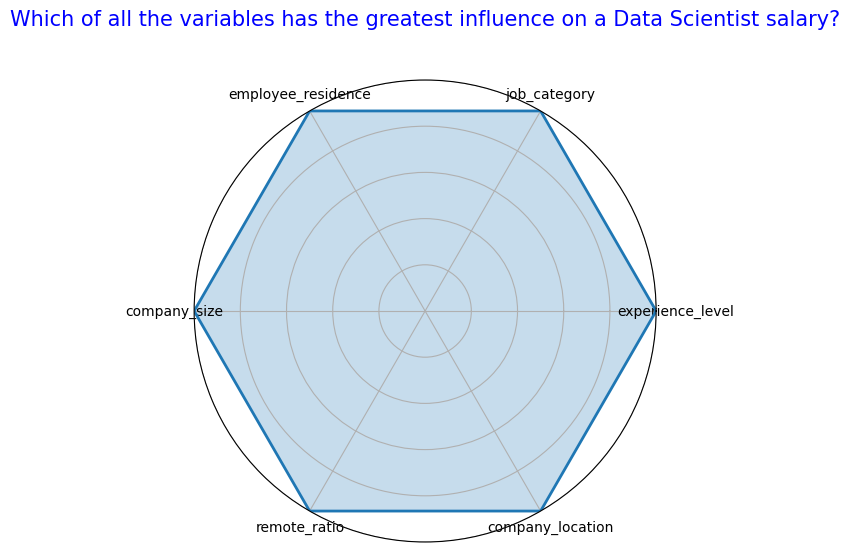

In [72]:
# Example of p-values for each factor
labels = ['experience_level','job_category', 'employee_residence', 'company_size', 'remote_ratio', 'company_location']
p_values = [3.9709007320584276e-39, 2.8667956941615096e-08, 2.8667956941615096e-08, 2.8667956941615096e-08, 3.9709007320584276e-39, 3.9709007320584276e-39]  # Replace with your p-values
p_values_normalized = [1 - min(1, val) for val in p_values]   # Invert so that lower p-values are closer to the edge

# Radar plot configuration
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]
p_values_normalized += p_values_normalized[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Draw a line with the normalized p-values
ax.plot(angles, p_values_normalized, linewidth=2, linestyle='solid')
ax.fill(angles, p_values_normalized, alpha=0.25)

# Add labels and title
ax.set_yticklabels([])
plt.xticks(angles[:-1], labels)
plt.title('Which of all the variables has the greatest influence on a Data Scientist salary?', size=15, color='blue', y=1.1)

plt.show()

Experience_level, remote_ratio, and company_location have extremely small p-values (3.97 x 10^-39), suggesting that these factors have the greatest influence. 

The other factors (job_category, employee_residence, and company_size) have a p-value of 2.87 x 10^-8, which also indicates significance but is lower in comparison to the first three factors.

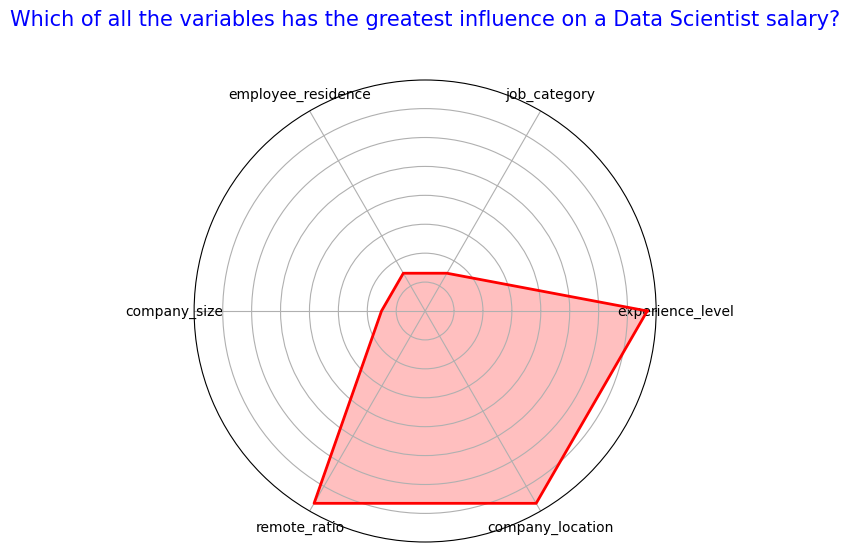

In [73]:
# Data
labels = ['experience_level','job_category', 'employee_residence', 'company_size', 'remote_ratio', 'company_location']
p_values = [3.9709007320584276e-39, 2.8667956941615096e-08, 2.8667956941615096e-08, 2.8667956941615096e-08, 3.9709007320584276e-39, 3.9709007320584276e-39]

# Convert p-values to logarithmic scale
log_p_values = -np.log10(p_values)
log_p_values = np.append(log_p_values, log_p_values[0])  # Add the first value to the end to close the circle


# # Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Add the first angle to the end to close the circle

# Create the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, log_p_values, color='red', alpha=0.25)
ax.plot(angles, log_p_values, color='red', linewidth=2)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Which of all the variables has the greatest influence on a Data Scientist salary?', size=15, color='blue', y=1.1)

# Save the plot as a PNG file
plt.savefig('greatest influence on a Data Scientist salary.png', dpi=300, bbox_inches='tight')

plt.show()



WINNING COMBINATION
QUESTIONS: In which of the following situations will the Data Science professional earn more?

A: I just finished my Data Science bootcamp, during which I discovered that I would love to become a Data Analyst. My family situation does not allow me to move to another country, and I would appreciate having a hybrid job. Since I am not fluent in foreign languages, I will only apply to Spanish companies located in Spain.

B: After a long professional career as a Data Manager in a U.S. multinational, I am being transferred to Switzerland indefinitely to take charge of the new branch. The job will be fully on-site.

C: After 2 years as a Data Scientist in a start-up located in London, he/she/they set up remote work to eliminate office costs.

D: Brexit "forced" the company I work for to implement certain structural changes. The headquarters was moved to Berlin. Taking advantage of the situation, they allowed me to return to my home country, Poland, and continue working remotely as a Senior Data Architect.
 

In [74]:
# Calculate the average salary according to Experience_level
df_mean_salary_experience_level = DataSalariesEurope.groupby('experience_level')['salary_in_euro'].mean().reset_index()
#df_mean_salary_experience_level

# Calculate the average salary according to company location
df_media_salarial_company_location = DataSalariesEurope.groupby('company_location')['salary_in_euro'].mean().reset_index()
#df_mean_salary_company_location

# Calculate the average salary according to job category
df_media_salarial_job_category = DataSalariesEurope.groupby('job_category')['salary_in_euro'].mean().reset_index()
#df_mean_salary_job_category

# Calculate the average salary according to employee residence
df_media_salarial_employee_residence = DataSalariesEurope.groupby('employee_residence')['salary_in_euro'].mean().reset_index()
#df_mean_salary_employee_residence

# Calculate the average salary according to remote ratio
df_media_salarial_remote_ratio = DataSalariesEurope.groupby('remote_ratio')['salary_in_euro'].mean().reset_index()
#df_mean_salary_remote_ratio

# Calculate the average salary according to company size
df_media_salarial_company_size = DataSalariesEurope.groupby('company_size')['salary_in_euro'].mean().reset_index()
#df_mean_salary_company_size


In [75]:
# Mean for A combination
df_concatenate = pd.DataFrame({
    'experience_level': df_mean_salary_experience_level.loc[df_mean_salary_experience_level['experience_level'] == 'EN', 'salary_in_euro'].reset_index(drop=True),
    'job_category': df_media_salarial_job_category.loc[df_media_salarial_job_category['job_category'] == 'Data Analyst', 'salary_in_euro'].reset_index(drop=True),
    'employee_residence': df_media_salarial_employee_residence.loc[df_media_salarial_employee_residence['employee_residence'] == 'ES', 'salary_in_euro'].reset_index(drop=True),
    'remote_ratio': df_media_salarial_remote_ratio.loc[df_media_salarial_remote_ratio['remote_ratio'] == 50, 'salary_in_euro'].reset_index(drop=True),
    'company_location': df_media_salarial_company_location.loc[df_media_salarial_company_location['company_location'] == 'ES', 'salary_in_euro'].reset_index(drop=True)
    
})

# Calcular el promedio y reiniciar el índice
A = df_concatenate.mean().reset_index()
#A
mean_A = A[0].mean()
#mean_A


In [76]:
# Mean for B combination
df_concatenate = pd.DataFrame({
    'experience_level': df_mean_salary_experience_level.loc[df_mean_salary_experience_level['experience_level'] == 'EX', 'salary_in_euro'].reset_index(drop=True),
    'job_category': df_media_salarial_job_category.loc[df_media_salarial_job_category['job_category'] == 'Data Manager', 'salary_in_euro'].reset_index(drop=True),
    'employee_residence': df_media_salarial_employee_residence.loc[df_media_salarial_employee_residence['employee_residence'] == 'CH', 'salary_in_euro'].reset_index(drop=True),
    'remote_ratio': df_media_salarial_remote_ratio.loc[df_media_salarial_remote_ratio['remote_ratio'] == 0, 'salary_in_euro'].reset_index(drop=True),
    'company_location': df_media_salarial_company_location.loc[df_media_salarial_company_location['company_location'] == 'US', 'salary_in_euro'].reset_index(drop=True),
    'company_size': df_media_salarial_company_size.loc[df_media_salarial_company_size['company_size'] == 'L', 'salary_in_euro'].reset_index(drop=True)
})

# Calcular el promedio y reiniciar el índice
B = df_concatenate.mean().reset_index()
#B
mean_B = B[0].mean()
#mean_B

In [77]:
# Mean for C combination
df_concatenate = pd.DataFrame({
    'experience_level': df_mean_salary_experience_level.loc[df_mean_salary_experience_level['experience_level'] == 'MI', 'salary_in_euro'].reset_index(drop=True),
    'job_category': df_media_salarial_job_category.loc[df_media_salarial_job_category['job_category'] == 'Data Scientist', 'salary_in_euro'].reset_index(drop=True),
    #'employee_residence': df_media_salarial_employee_residence.loc[df_media_salarial_employee_residence['employee_residence'] == 'CH', 'salary_in_euro'].reset_index(drop=True),
    'remote_ratio': df_media_salarial_remote_ratio.loc[df_media_salarial_remote_ratio['remote_ratio'] == 100, 'salary_in_euro'].reset_index(drop=True),
    'company_location': df_media_salarial_company_location.loc[df_media_salarial_company_location['company_location'] == 'GB', 'salary_in_euro'].reset_index(drop=True),
    'company_size': df_media_salarial_company_size.loc[df_media_salarial_company_size['company_size'] == 'S', 'salary_in_euro'].reset_index(drop=True)
})

# Calcular el promedio y reiniciar el índice
C = df_concatenate.mean().reset_index()
#C
mean_C = C[0].mean()
#mean_C

In [78]:
# Mean for D combination
df_concatenate = pd.DataFrame({
    'experience_level': df_mean_salary_experience_level.loc[df_mean_salary_experience_level['experience_level'] == 'SE', 'salary_in_euro'].reset_index(drop=True),
    'job_category': df_media_salarial_job_category.loc[df_media_salarial_job_category['job_category'] == 'Data Architect / Data Engineer', 'salary_in_euro'].reset_index(drop=True),
    'employee_residence': df_media_salarial_employee_residence.loc[df_media_salarial_employee_residence['employee_residence'] == 'PL', 'salary_in_euro'].reset_index(drop=True),
    'remote_ratio': df_media_salarial_remote_ratio.loc[df_media_salarial_remote_ratio['remote_ratio'] == 100, 'salary_in_euro'].reset_index(drop=True),
    'company_location': df_media_salarial_company_location.loc[df_media_salarial_company_location['company_location'] == 'DE', 'salary_in_euro'].reset_index(drop=True),
    #'company_size': df_media_salarial_company_size.loc[df_media_salarial_company_size['company_size'] == 'S', 'salary_in_euro'].reset_index(drop=True)
})

# Calcular el promedio y reiniciar el índice
D = df_concatenate.mean().reset_index()
#D
mean_D = D[0].mean()
#mean_D

In [79]:
# Answer Means 

# Create a new DataFrame with the means
df_answer_mean = pd.DataFrame({
    'Mean': [mean_A, mean_B, mean_C, mean_D]
}, index=['A', 'B', 'C', 'D'])
df_answer_mean = df_answer_mean.reset_index()
df_answer_mean

# Sort the DataFrame by the 'Mean' column in descending order
df_answer_mean_sorted = df_answer_mean.sort_values(by='Mean', ascending=False)
df_answer_mean_sorted



,index,Mean
1,B,95488.888494
3,D,82727.355429
2,C,75005.720396
0,A,56769.533085


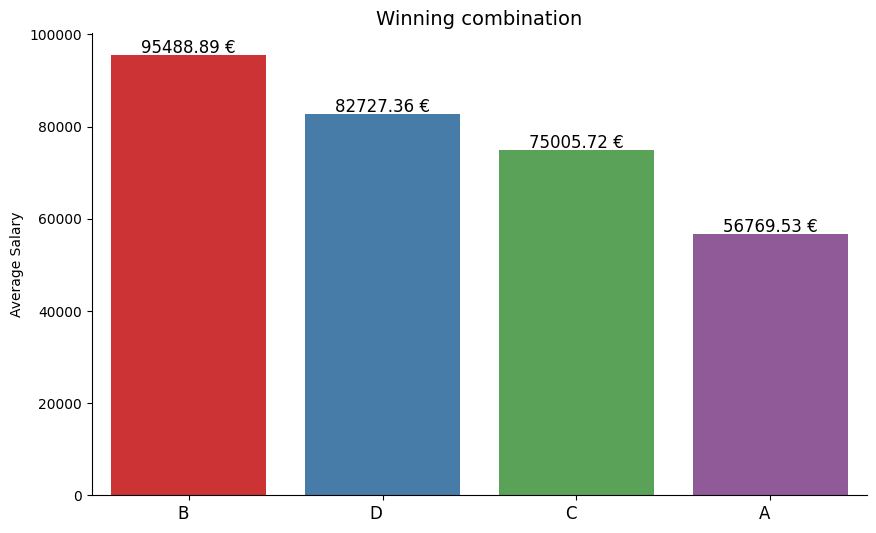

In [80]:
# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='Mean', data=df_answer_mean_sorted, palette='Set1')

# Add salary mean labels on each bar with the euro symbol
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} €', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Winning combination',fontsize=14          )
plt.xlabel('')
plt.xticks(ha='right',fontsize=12)
plt.ylabel('Average Salary')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Save the plot as a PNG file
plt.savefig('winning_combination.png', format='png', dpi=300)

plt.show()